In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

In [2]:
file = 'data/train.csv'
df = pd.read_csv(file)
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


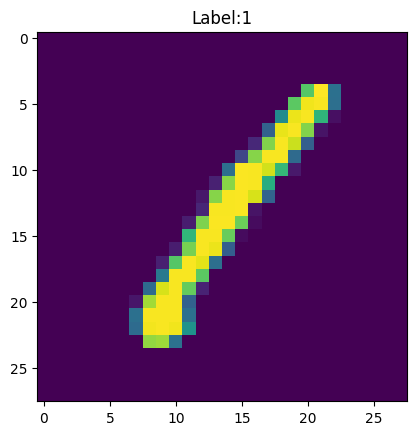

In [3]:
def plot_sample(df,index):
    sp = np.array(df.iloc[index])
    plt.imshow(sp[1:].reshape((28,28)))
    plt.title('Label:{}'.format(sp[0]))

plot_sample(df,0)

In [4]:
len(df)

42000

In [58]:
class DigitDataset(Dataset):
    def __init__(self,df,transforms):
        #super(DigitDataset,self).__init__()
        self.df = df
        self.transforms = transforms
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self,idx):
        item = np.array(self.df.iloc[idx]).astype(np.float32)
        x = item[1:].reshape((28,28))
        x = self.transforms(x)
        y = item[0]
        return x, y

In [57]:
composed = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomCrop(25),
    transforms.RandomRotation(15),
    transforms.Normalize(mean=0., std=1.)
])

In [60]:
ds = DigitDataset(df,composed)
dl = DataLoader(ds, batch_size=16)

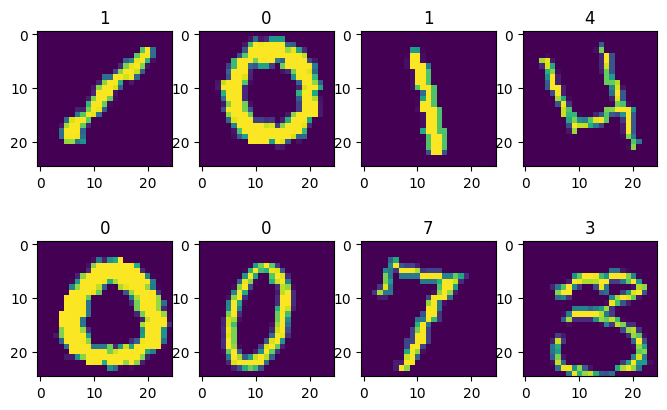

In [62]:
def show_samples(batch):
    fig, axes = plt.subplots(2,4,figsize=((8,5)))
    axes = axes.ravel()
    for i in range(8):
        axes[i].imshow(batch[0][i].squeeze())
        axes[i].set_title(int(batch[1][i]))
        
show_samples(next(iter(dl)))

#### Apply augmentations to a sample

In [9]:
sample_batch = next(iter(dl))

In [23]:
sample = ds.__getitem__(0)
randomcrop = transforms.RandomCrop(25)
randomrotation = transforms.RandomRotation(15)

transformed_imgs = randomrotation(sample_batch[0])

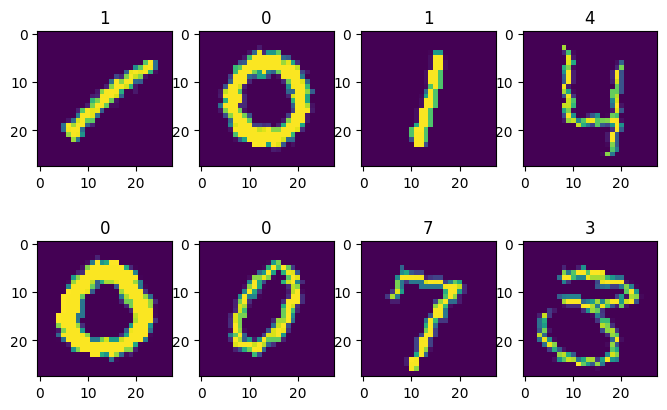

In [24]:
show_samples([transformed_imgs,sample_batch[1]])

#### Compose the augmentations

In [57]:
composed = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomCrop(25),
    transforms.RandomRotation(15),
    transforms.Normalize(mean=0., std=1.)
])

In [50]:
sample_item = ds.__getitem__(0)